<a href="https://colab.research.google.com/github/aroonaram/Deep-learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

 89% 61.0M/68.8M [00:00<00:00, 139MB/s]
100% 68.8M/68.8M [00:00<00:00, 116MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
!unzip \*.zip && rm*.zip

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  
/bin/bash: rm*.zip: command not found


In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')
train = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
len(train)
train.head

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          2       0       0       0  ...         0         0         0         0
1          9       0       0       0  ...         0         0         0         0
2          6       0       0       0  ...         0         0         0         0
3          0       0       0       0  ...         0         0         0         0
4          3       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
59995      9       0       0       0  ...         0         0         0         0
59996      1       0       0       0  ...         0         0         0         0
59997      8       0       0       0  ...         0         0         0         0
59998      8       0       0       0  ...         0         0         0         0
59999      7       0       0       0  ...         0         0       

In [ ]:
# dataframe to numpy array
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

In [ ]:
x_test = test_data[:,1:]/255
y_test = test_data[:,0]
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

In [ ]:
x_train ,x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state = 12345,)


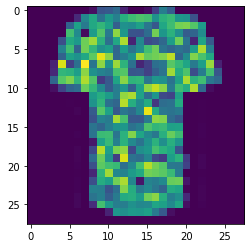

In [ ]:
image = x_train[499,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
# Define, compile, fit

In [ ]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_train.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (48000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')

])

In [ ]:
cnn_model.compile(
    loss ='sparse_categorical_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
cnn_model.fit(
    x_train,y_train, batch_size = batch_size,
    epochs = 10, verbose =1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
94/94 [==============================] - 36s 215ms/step - loss: 1.2046 - accuracy: 0.6115 - val_loss: 0.4713 - val_accuracy: 0.8343
Epoch 2/10
94/94 [==============================] - 20s 211ms/step - loss: 0.4536 - accuracy: 0.8398 - val_loss: 0.3992 - val_accuracy: 0.8577
Epoch 3/10
94/94 [==============================] - 20s 212ms/step - loss: 0.3838 - accuracy: 0.8636 - val_loss: 0.3542 - val_accuracy: 0.8776
Epoch 4/10
94/94 [==============================] - 20s 212ms/step - loss: 0.3489 - accuracy: 0.8780 - val_loss: 0.3312 - val_accuracy: 0.8848
Epoch 5/10
94/94 [==============================] - 20s 210ms/step - loss: 0.3346 - accuracy: 0.8827 - val_loss: 0.3145 - val_accuracy: 0.8880
Epoch 6/10
94/94 [==============================] - 20s 211ms/step - loss: 0.3111 - accuracy: 0.8888 - val_loss: 0.3163 - val_accuracy: 0.8856
Epoch 7/10
94/94 [==============================] - 20s 212ms/step - loss: 0.3086 - accuracy: 0.8910 - val_loss: 0.2981 - val_accuracy: 0.8964